In [1]:
import os
import io
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
import csv, shutil
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn import cluster
import ujson as json
import random
%matplotlib inline
new_style = {'grid': False}
plt.rc('axes', **new_style)
random.seed(100);

In [2]:
# Set working directory
os.chdir('../')
path = ""
os.getcwd()

'/home/ubuntu/fish'

In [ ]:
szVOC

In [38]:
def draw_rect(ax, bb, size):
    rect = patches.Rectangle((bb[1]*size[1], (bb[3]-(bb[4]/2))*size[1]), (bb[3]-(bb[4]/2))*size[1], (bb[3]+(bb[4]/2))*size[1],linewidth=1,edgecolor='r',facecolor='none', lw=3)
    return ax.add_patch(rect)

In [41]:
bbVOC = pd.read_csv("/home/ubuntu/fish/darknet/VOC/VOCdevkit/VOC2007/labels/000012.txt", sep = " ", header=None)
bbrowvals = bbVOC.iloc[0].values
bbrowvals

array([ 6.        ,  0.507     ,  0.55105105,  0.39      ,  0.51951952])

In [29]:
szVOC = Image.open('/home/ubuntu/fish/darknet/VOC/VOCdevkit/VOC2007/JPEGImages/000012.jpg').size
szVOC

(500, 333)

In [30]:
bbFISH = pd.read_csv("/home/ubuntu/fish/darknet/FISH/labels/img_00003.txt", sep = " ", header=None)
bbFISH

,0,1,2,3,4
0,0,0.432422,0.165972,0.275781,0.148611
1,0,0.655469,0.218056,0.264062,0.172222
2,0,0.758984,0.564583,0.236719,0.218056
3,0,0.364844,0.367361,0.275000,0.395833


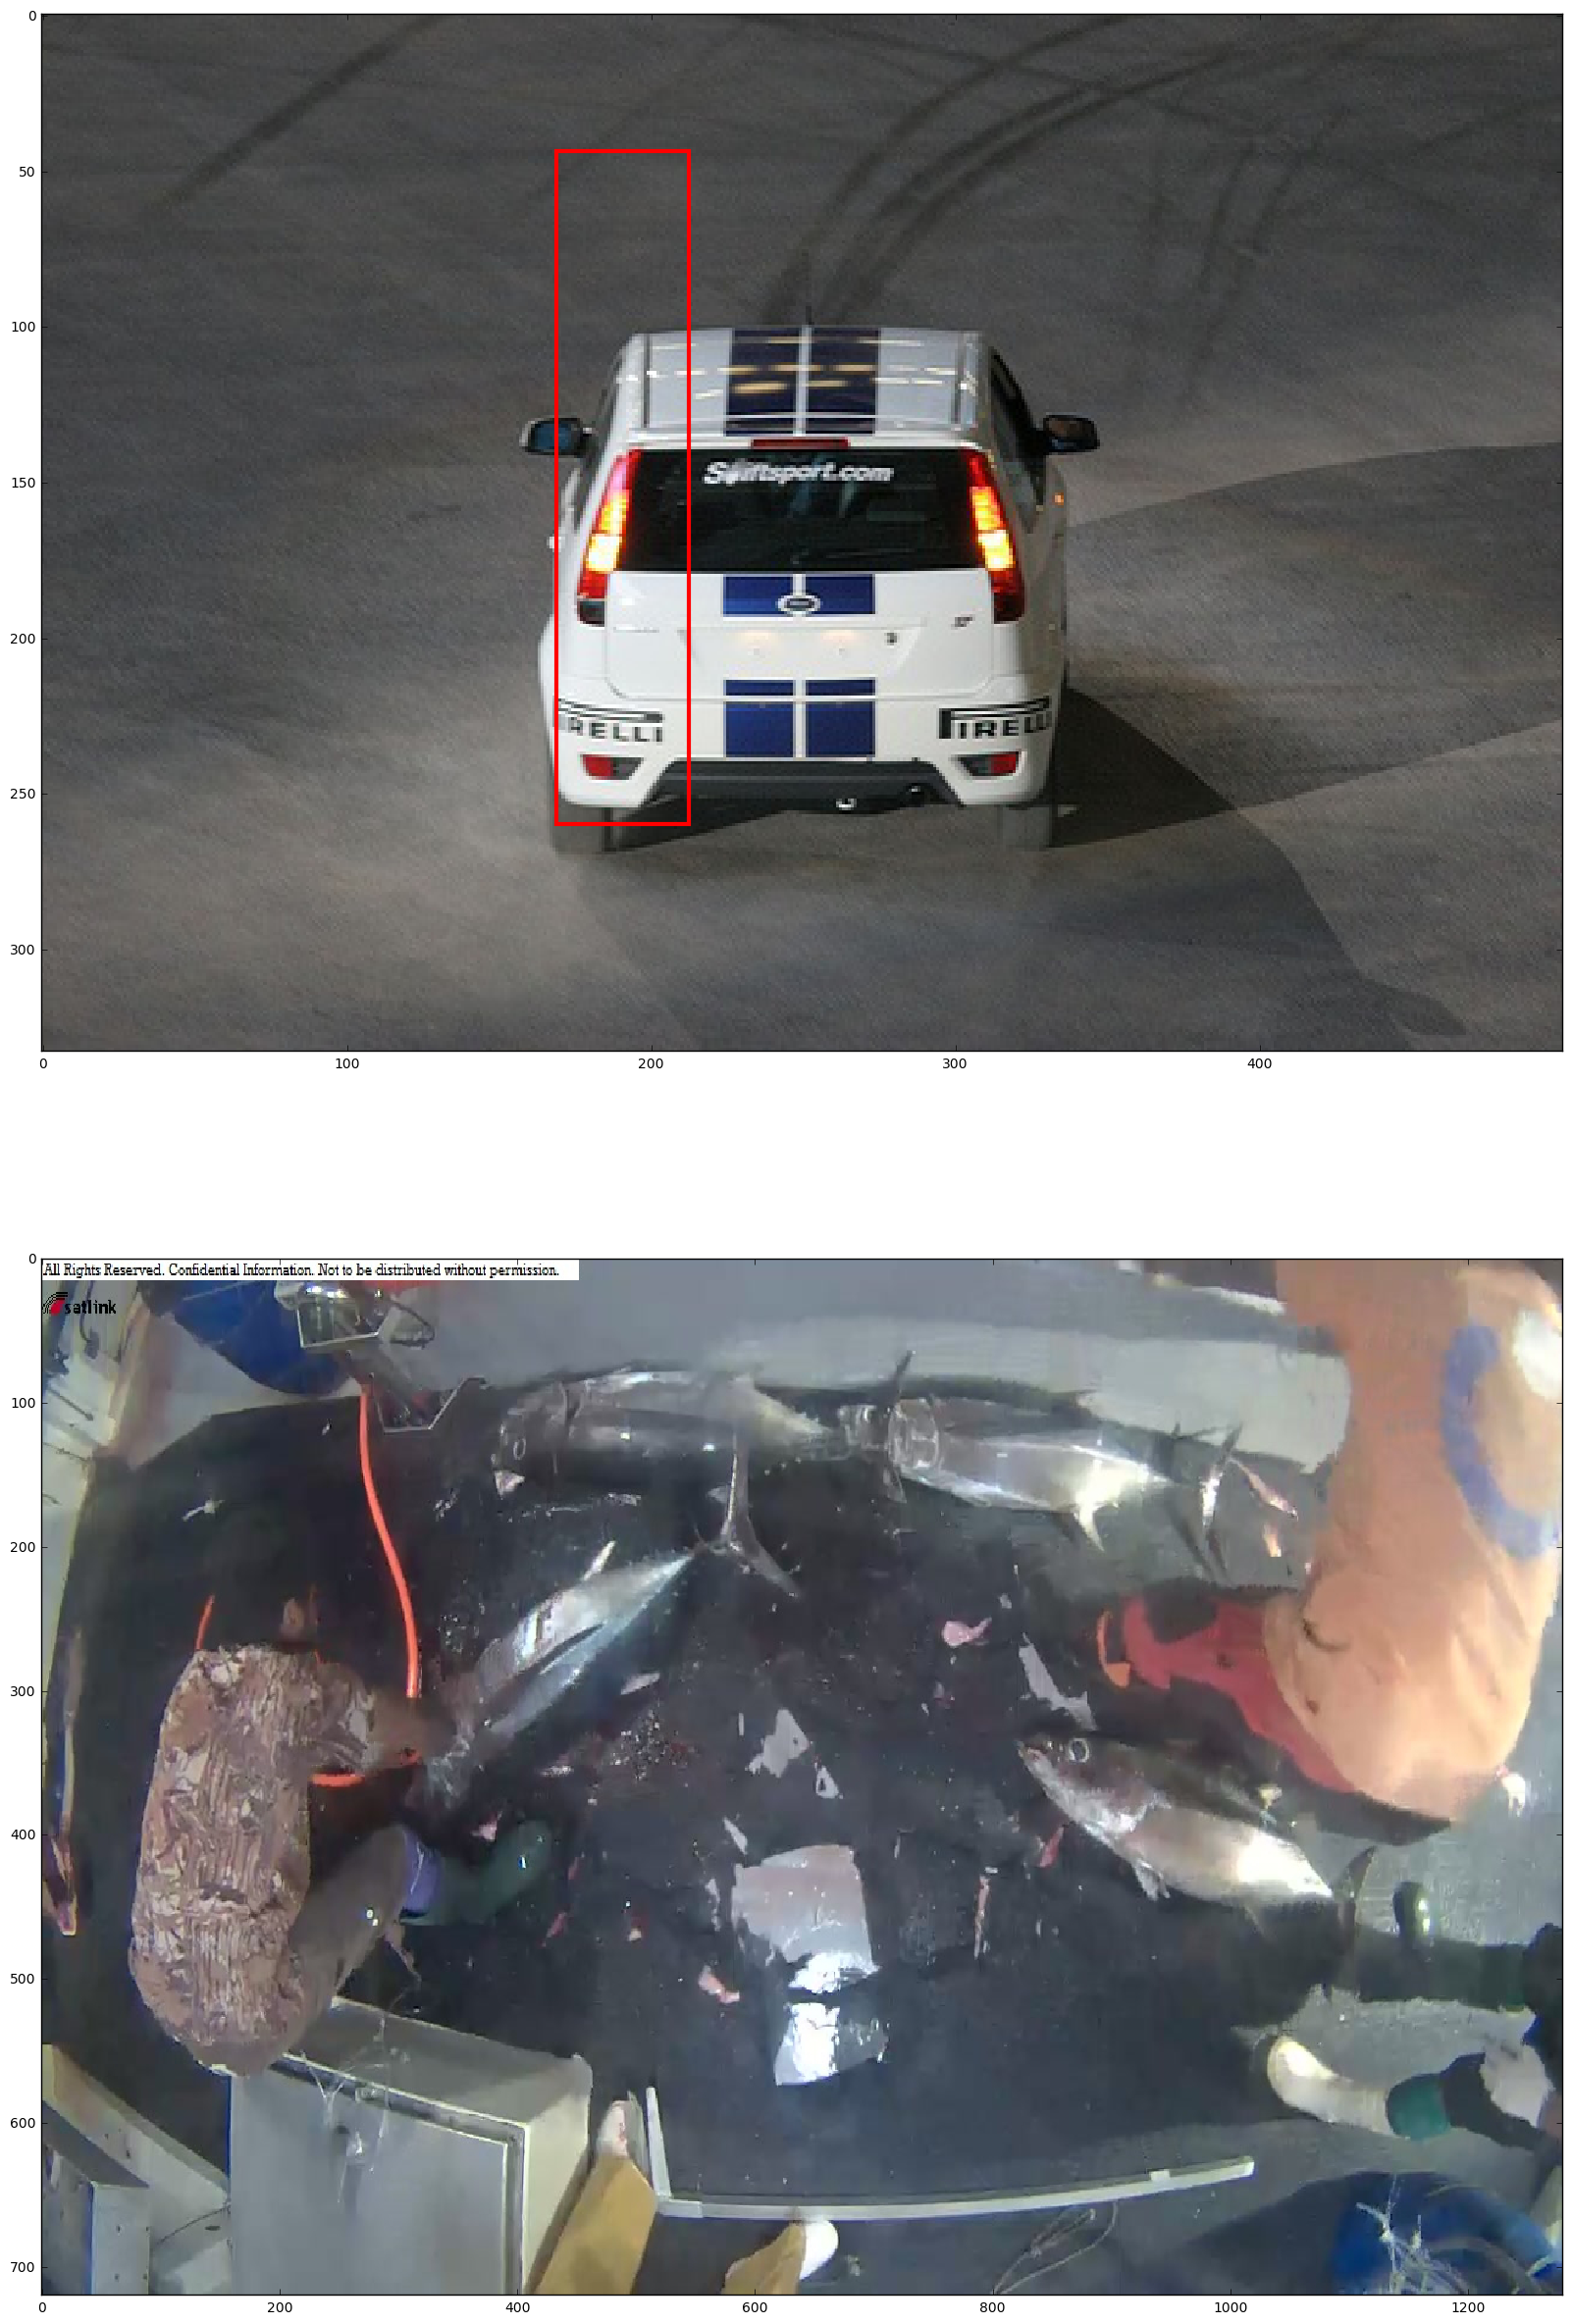

In [39]:
counter = 0
_, ax = plt.subplots(2, 1, figsize=(20, 30))
axis = ax[1]
imgFISH = Image.open('data/fish/train-all/ALB/img_00003.jpg')
axis.imshow(np.asarray(imgFISH), interpolation='nearest', aspect='auto')  
axis = ax[0]
draw_rect(axis, bbVOC, szVOC)
imgVOC = Image.open('/home/ubuntu/fish/darknet/VOC/VOCdevkit/VOC2007/JPEGImages/000012.jpg')
axis.imshow(np.asarray(imgVOC), interpolation='nearest', aspect='auto')  
